In [15]:
import pandas as pd
  
matri = pd.read_stata('https://github.com/Proyecto-Magallanes/Dashboard/raw/main/data/matrimonio.dta')
embara2022 = pd.read_stata('https://github.com/Proyecto-Magallanes/Dashboard/raw/main/data/embarazo-2022.dta')
embara2021 = pd.read_stata('https://github.com/Proyecto-Magallanes/Dashboard/raw/main/data/embarazo.dta')
embara2020 = pd.read_stata('https://github.com/Proyecto-Magallanes/Dashboard/raw/main/data/embarazo-2020.dta')
embara2019 = pd.read_stata('https://github.com/Proyecto-Magallanes/Dashboard/raw/main/data/embarazo-2019.dta')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [41]:
embara2022['year'] = '2022_emba'
embara2021['year'] = '2021_emba'
embara2020['year'] = '2020_emba'
embara2019['year'] = '2019_emba'

In [49]:
df = pd.concat([embara2022, embara2021, embara2020, embara2019], ignore_index=True)
df

,V023,embara,year
0,Amazonas,4.443319,2022_emba
1,Ancash,0.301272,2022_emba
2,Apurimac,3.054922,2022_emba
3,Arequipa,1.212529,2022_emba
4,Ayacucho,2.074109,2022_emba
...,...,...,...
95,Puno,0.293140,2019_emba
96,San_Martin,4.509174,2019_emba
97,Tacna,1.683604,2019_emba
98,Tumbes,2.644926,2019_emba


In [50]:
df['V023'] = df['V023'].str.upper().str.strip()
df['V023'] = df['V023'].str.replace('_',' ')

In [52]:
# to wide
df=pd.pivot_table(df,
               values='embara', # values to use
               index=['V023'], # unit of analysis
               columns=['year']) # the values for NEW column
# see wide
df

year,2019_emba,2020_emba,2021_emba,2022_emba
V023,,,,
AMAZONAS,6.594434,2.287450,2.837393,4.443319
ANCASH,2.251308,1.451668,0.601753,0.301272
APURIMAC,1.292593,1.477868,5.648242,3.054922
AREQUIPA,1.400310,0.385852,3.010771,1.212529
AYACUCHO,2.190061,1.489757,2.198520,2.074109
CAJAMARCA,1.732945,4.119957,3.208621,2.272505
CALLAO,0.000000,1.627594,3.100111,3.420131
CUSCO,1.920599,1.388067,0.000000,1.377489
HUANCAVELICA,1.092259,1.380500,2.915410,2.072900


In [53]:
df= df.reset_index(drop=False).\
             rename_axis(index=None, columns=None) # no name for indexes

# result:
df.head()

,V023,2019_emba,2020_emba,2021_emba,2022_emba
0,AMAZONAS,6.594434,2.287450,2.837393,4.443319
1,ANCASH,2.251308,1.451668,0.601753,0.301272
2,APURIMAC,1.292593,1.477868,5.648242,3.054922
3,AREQUIPA,1.400310,0.385852,3.010771,1.212529
4,AYACUCHO,2.190061,1.489757,2.198520,2.074109


In [54]:
df=df.rename(columns={'V023':'DEPARTAMEN'})
df

,DEPARTAMEN,2019_emba,2020_emba,2021_emba,2022_emba
0,AMAZONAS,6.594434,2.287450,2.837393,4.443319
1,ANCASH,2.251308,1.451668,0.601753,0.301272
2,APURIMAC,1.292593,1.477868,5.648242,3.054922
3,AREQUIPA,1.400310,0.385852,3.010771,1.212529
4,AYACUCHO,2.190061,1.489757,2.198520,2.074109
5,CAJAMARCA,1.732945,4.119957,3.208621,2.272505
6,CALLAO,0.000000,1.627594,3.100111,3.420131
7,CUSCO,1.920599,1.388067,0.000000,1.377489
8,HUANCAVELICA,1.092259,1.380500,2.915410,2.072900
9,HUANUCO,3.229900,0.285387,0.988595,3.428313


In [55]:
df[['2019_emba','2020_emba','2021_emba','2022_emba']]=df[['2019_emba','2020_emba','2021_emba','2022_emba']]. apply(pd.to_numeric)

In [56]:
#Data Scaling
columnsToScale=['2019_emba','2020_emba','2021_emba','2022_emba'] # you can add more columns

from sklearn import preprocessing

minmaxSc = preprocessing.MinMaxScaler(feature_range=(0, 10))

minmaxResult = minmaxSc.fit_transform(df[columnsToScale])

minmaxResult

array([[10.        ,  3.0937302 ,  4.183324  ,  9.386672  ],
       [ 3.4139519 ,  1.963352  ,  0.8871977 ,  0.        ],
       [ 1.9601271 ,  1.9987866 ,  8.327513  ,  6.2402973 ],
       [ 2.123472  ,  0.52185714,  4.4389443 ,  2.065083  ],
       [ 3.3210752 ,  2.014866  ,  3.2413988 ,  4.017588  ],
       [ 2.62789   ,  5.572159  ,  4.7306447 ,  4.4671907 ],
       [ 0.        ,  2.2012877 ,  4.5706635 ,  7.067931  ],
       [ 2.9124553 ,  1.8773323 ,  0.        ,  2.4389148 ],
       [ 1.656335  ,  1.8670988 ,  4.298348  ,  4.0148473 ],
       [ 4.8979177 ,  0.38597992,  1.4575403 ,  7.0864744 ],
       [ 4.7132697 ,  7.2158747 ,  4.9069133 ,  6.4543624 ],
       [ 3.6267798 ,  2.997462  ,  4.3368387 ,  5.2876987 ],
       [ 1.3889129 ,  0.23490973,  7.864206  ,  3.052236  ],
       [ 7.160285  ,  4.032197  ,  3.379803  ,  0.400522  ],
       [ 1.4110222 ,  2.1477358 ,  1.8460491 ,  0.83759344],
       [ 9.026219  ,  0.35100642,  7.2791886 ,  7.191946  ],
       [ 7.030688  ,  0.

In [57]:
df['Total_minMax_2019']=minmaxResult[:, 0]
df['Total_minMax_2020']=minmaxResult[:, 1]
df['Total_minMax_2021']=minmaxResult[:, 2]
df['Total_minMax_2022']=minmaxResult[:, 3]

In [58]:
#Empezamos con el Mapa
import geopandas as gpd
import os

Peru=gpd.read_file(os.path.join("mapas", "peruMaps.gpkg"))

In [59]:
theMap=Peru.merge(df,on='DEPARTAMEN')
theMap

,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,geometry,2019_emba,2020_emba,2021_emba,2022_emba,Total_minMax_2019,Total_minMax_2020,Total_minMax_2021,Total_minMax_2022
0,01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",6.594434,2.287450,2.837393,4.443319,10.000000,3.093730,4.183324,9.386672
1,02,ANCASH,HUARAZ,INEI,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...",2.251308,1.451668,0.601753,0.301272,3.413952,1.963352,0.887198,0.000000
2,03,APURIMAC,ABANCAY,INEI,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...",1.292593,1.477868,5.648242,3.054922,1.960127,1.998787,8.327513,6.240297
3,04,AREQUIPA,AREQUIPA,INEI,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",1.400310,0.385852,3.010771,1.212529,2.123472,0.521857,4.438944,2.065083
4,05,AYACUCHO,AYACUCHO,INEI,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...",2.190061,1.489757,2.198520,2.074109,3.321075,2.014866,3.241399,4.017588
5,06,CAJAMARCA,CAJAMARCA,INEI,"POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...",1.732945,4.119957,3.208621,2.272505,2.627890,5.572159,4.730645,4.467191
6,07,CALLAO,CALLAO,INEI,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8...",0.000000,1.627594,3.100111,3.420131,0.000000,2.201288,4.570663,7.067931
7,08,CUSCO,CUSCO,INEI,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...",1.920599,1.388067,0.000000,1.377489,2.912455,1.877332,0.000000,2.438915
8,09,HUANCAVELICA,HUANCAVELICA,INEI,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...",1.092259,1.380500,2.915410,2.072900,1.656335,1.867099,4.298348,4.014847
9,10,HUANUCO,HUANUCO,INEI,"POLYGON ((-76.00486 -8.30517, -76.00301 -8.305...",3.229900,0.285387,0.988595,3.428313,4.897918,0.385980,1.457540,7.086474


In [65]:
#Intervalos
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar2019=theMap.Total_minMax_2019
theVar2020=theMap.Total_minMax_2020
theVar2021=theMap.Total_minMax_2021
theVar2022=theMap.Total_minMax_2022
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd2019 = mapclassify.StdMean(theVar2019)
msd2020 = mapclassify.StdMean(theVar2020)
msd2021 = mapclassify.StdMean(theVar2021)
msd2022 = mapclassify.StdMean(theVar2022)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)
# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

In [61]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

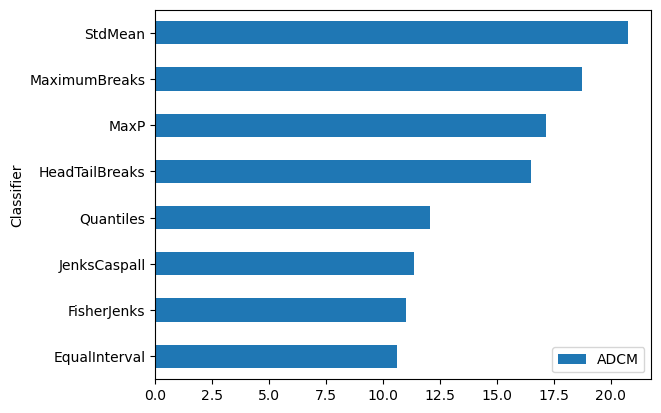

In [62]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [67]:
theMap['Total_msd2019'] = msd2019.yb
theMap['Total_msd2020'] = msd2020.yb
theMap['Total_msd2021'] = msd2021.yb
theMap['Total_msd2022'] = msd2022.yb
theMap

,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,geometry,2019_emba,2020_emba,2021_emba,2022_emba,Total_minMax_2019,...,Total_minMax_2021,Total_minMax_2022,Total_msd_2019,Total_msd_2020,Total_msd_2021,Total_msd_2022,Total_msd2019,Total_msd2020,Total_msd2021,Total_msd2022
0,01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",6.594434,2.287450,2.837393,4.443319,10.000000,...,4.183324,9.386672,4,2,2,3,4,2,2,3
1,02,ANCASH,HUARAZ,INEI,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...",2.251308,1.451668,0.601753,0.301272,3.413952,...,0.887198,0.000000,2,2,1,1,2,2,1,1
2,03,APURIMAC,ABANCAY,INEI,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...",1.292593,1.477868,5.648242,3.054922,1.960127,...,8.327513,6.240297,2,2,3,2,2,2,3,2
3,04,AREQUIPA,AREQUIPA,INEI,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",1.400310,0.385852,3.010771,1.212529,2.123472,...,4.438944,2.065083,2,2,2,2,2,2,2,2
4,05,AYACUCHO,AYACUCHO,INEI,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...",2.190061,1.489757,2.198520,2.074109,3.321075,...,3.241399,4.017588,2,2,2,2,2,2,2,2
5,06,CAJAMARCA,CAJAMARCA,INEI,"POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...",1.732945,4.119957,3.208621,2.272505,2.627890,...,4.730645,4.467191,2,3,2,2,2,3,2,2
6,07,CALLAO,CALLAO,INEI,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8...",0.000000,1.627594,3.100111,3.420131,0.000000,...,4.570663,7.067931,1,2,2,2,1,2,2,2
7,08,CUSCO,CUSCO,INEI,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...",1.920599,1.388067,0.000000,1.377489,2.912455,...,0.000000,2.438915,2,2,1,2,2,2,1,2
8,09,HUANCAVELICA,HUANCAVELICA,INEI,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...",1.092259,1.380500,2.915410,2.072900,1.656335,...,4.298348,4.014847,2,2,2,2,2,2,2,2
9,10,HUANUCO,HUANUCO,INEI,"POLYGON ((-76.00486 -8.30517, -76.00301 -8.305...",3.229900,0.285387,0.988595,3.428313,4.897918,...,1.457540,7.086474,2,2,2,2,2,2,2,2


In [68]:
changes={1:"1_Muy Bajo", 2:"2_Bajo", 3:"3_Alto", 4:"4_Muy Alto"}
theMap[['Total_msd2019', 'Total_msd2020', 'Total_msd2021', 'Total_msd2022']]=theMap.loc[:,['Total_msd2019', 'Total_msd2020', 'Total_msd2021', 'Total_msd2022']].replace(to_replace=changes)


In [69]:
theMap.to_file(os.path.join("mapas","PeruMapa2019_2022.gpkg"), layer='peru', driver="GPKG")

In [20]:
#rescalando
theMap=theMap.to_crs(8858)
theMap['centroid']=theMap.geometry.centroid

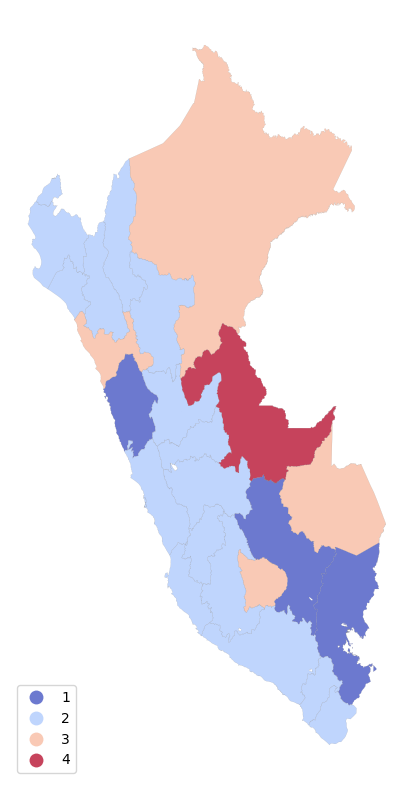

In [21]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMap.plot(column='Total_msd_embara', 
        cmap='coolwarm', 
        categorical=True,
        edgecolor='grey', 
        linewidth=0.1, 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

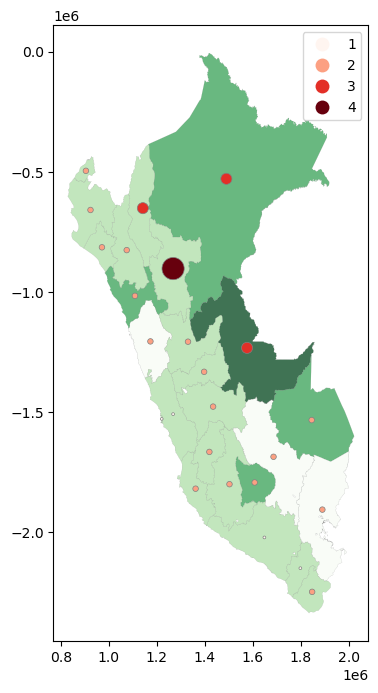

In [22]:
# just the plot

f, ax = plt.subplots(1, figsize=(8, 8))
base=theMap.plot(column='Total_msd_embara', 
        cmap='Greens', 
        categorical=True,
        edgecolor='grey', 
        linewidth=0.1, 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

# another column, with the size of the POINTS (based on "Total_ei5")
theMap["sizeOfMarker_msd_matri"]=[4**exp for exp in theMap["Total_msd_matri"]]

# now, plotting the centroids (declared as the geometry)!!!
mapa1 = theMap.set_geometry("centroid").plot(column="Total_msd_matri",
                                         categorical=True,
                                         markersize=theMap["sizeOfMarker_msd_matri"],
                                         cmap='Reds',
                                         edgecolor='grey',
                                         linewidth=0.5,
                                         legend=True,
                                         ax=base)
#plt.savefig(os.path.join("imagenes","mapa1.png"))

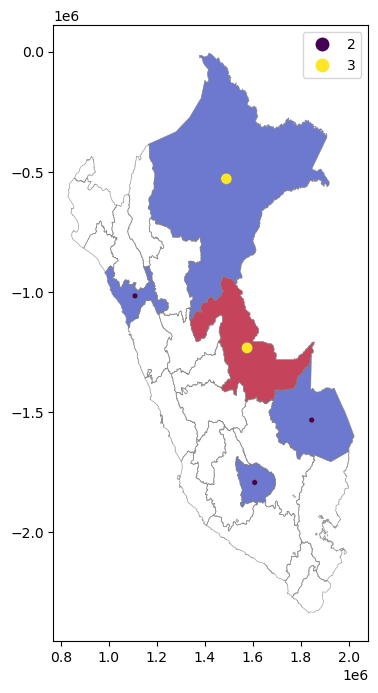

In [23]:
import seaborn as sns


f, ax = plt.subplots(1, figsize=(8, 8))

# Trazar todas las regiones en gris con bordes notables
theMap.boundary.plot(ax=ax, color='grey', linewidth=0.5, alpha=0.75)

# Filtrar las regiones con una alta tasa de embarazo (por ejemplo, con una tasa mayor a un cierto umbral)
umbral_embarazo = 2  # Ajusta el umbral según tus datos
regiones_altas_embarazo = theMap[theMap['Total_msd_embara'] > umbral_embarazo]

# Calcular el tamaño de los centroides basado en Total_msd_matri
regiones_altas_embarazo.loc[:, "sizeOfMarker_msd_matri"] = 4 ** regiones_altas_embarazo["Total_msd_matri"]


# Trazar solo las regiones con alta tasa de embarazo en verde
regiones_altas_embarazo.plot(column='Total_msd_embara', 
                             cmap='coolwarm', 
                             categorical=True,
                             edgecolor='grey',  # Establecer el color del borde en negro
                             linewidth=0.01,  # Aumentar el ancho del borde
                             alpha=0.75, 
                             legend=True,
                             legend_kwds={'loc': 3},
                             ax=ax
                            )

# Trazar los centroides solo en las regiones con alta tasa de embarazo con tamaños variables
regiones_altas_embarazo.set_geometry("centroid").plot(column="Total_msd_matri",
                                                      categorical=True,
                                                      markersize="sizeOfMarker_msd_matri",  # Tamaño variable basado en la nueva columna
                                                      cmap='viridis',
                                                      edgecolor='grey',  # Establecer el color del borde en negro
                                                      linewidth=0.3,  # Aumentar el ancho del borde
                                                      legend=True,
                                                      ax=ax
                                                     )


plt.savefig(os.path.join("imagenes","mapa2.png"))

In [24]:
plt.savefig(os.path.join("imagenes","mapa1.png"))
# save the map as image (create "images" folder first)
#plt.savefig(os.path.join("images",'Brasil_3layers.jpg'))

<Figure size 640x480 with 0 Axes>